<a href="https://colab.research.google.com/github/vkvachenok/admp/blob/main/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Завдання 1**

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["Medical_Cost.csv"]))

Saving Medical_Cost.csv to Medical_Cost.csv


### **Завдання 2**

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Завдання 3**

<ipython-input-10-385fdf4e2148>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


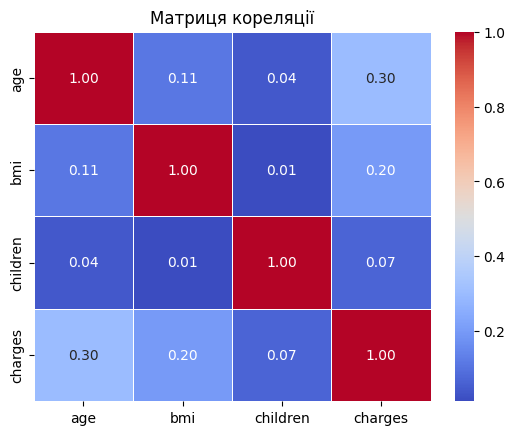

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матриця кореляції')
plt.show()


### **Завдання 4**

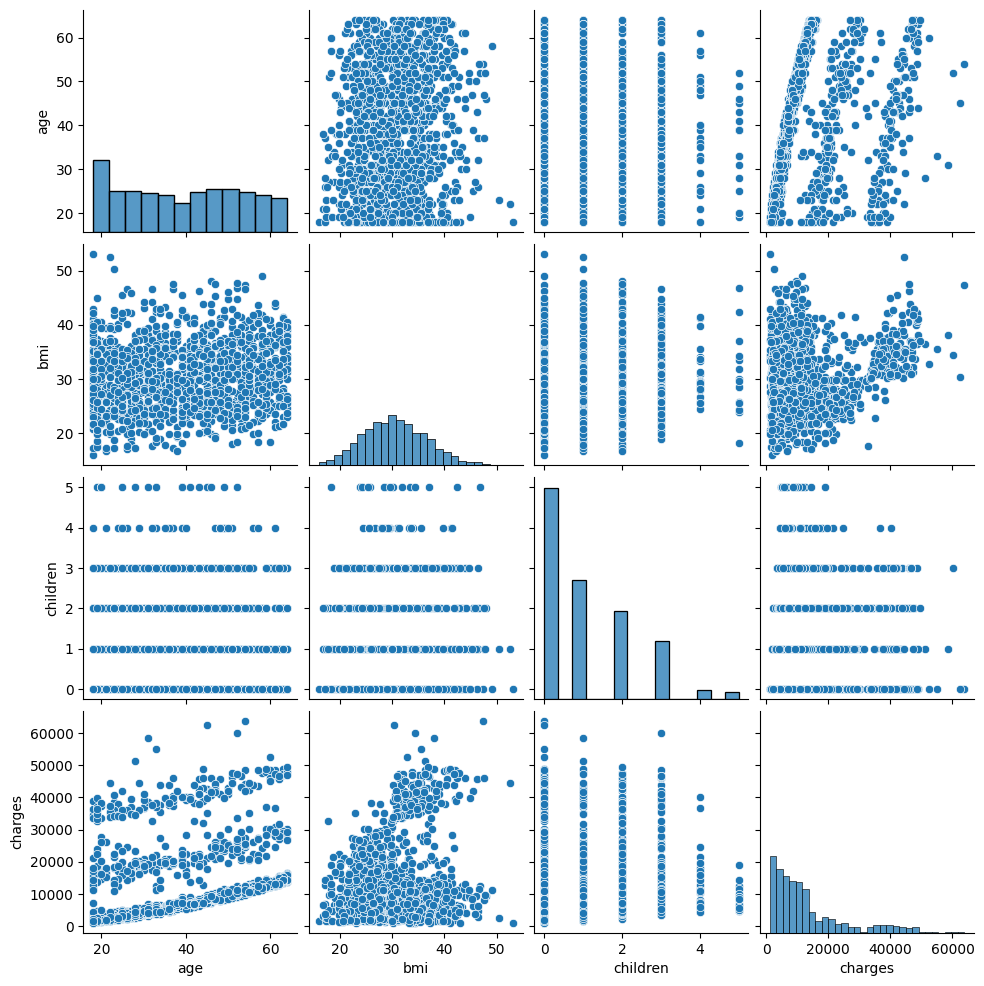

In [ ]:
cols = ['age', 'bmi', 'children', 'charges']
sns.pairplot(df[cols])

### **Завдання 5**

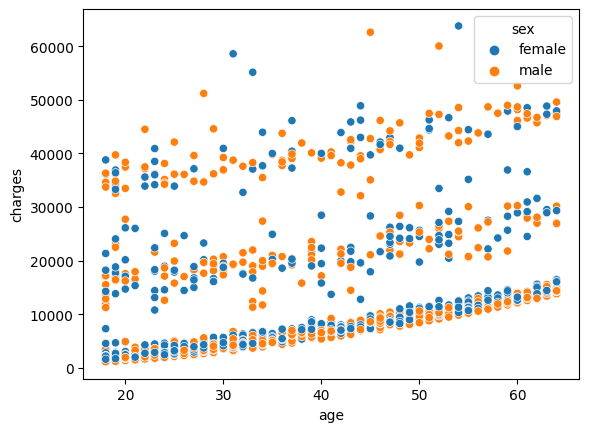

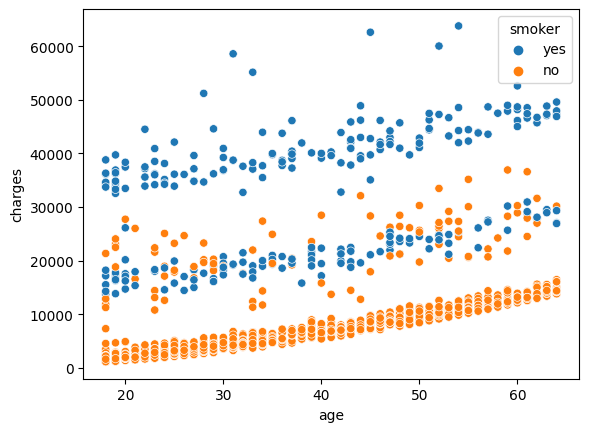

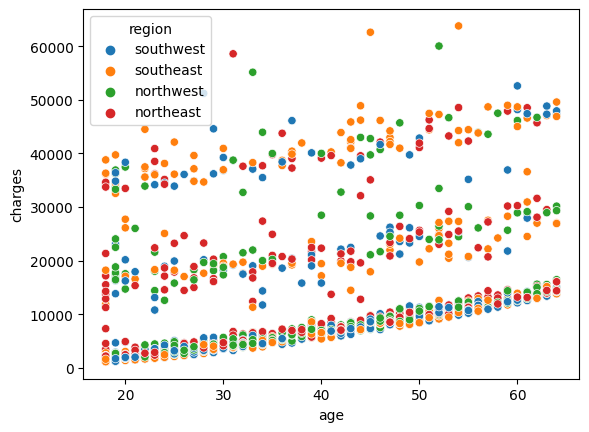

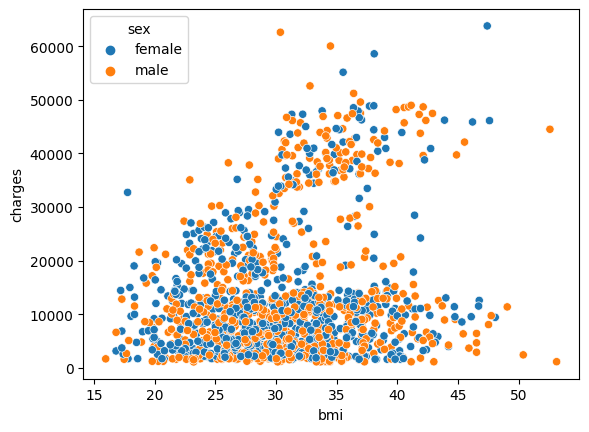

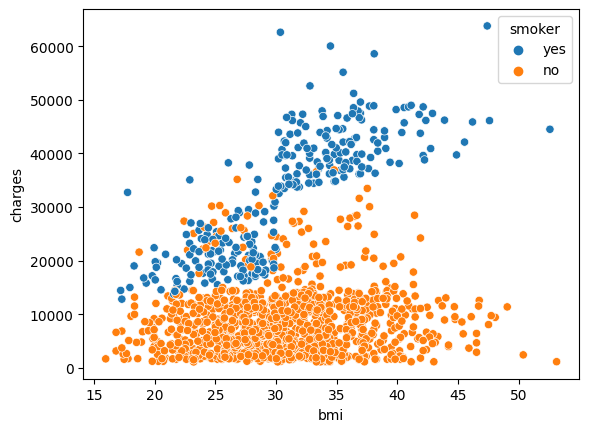

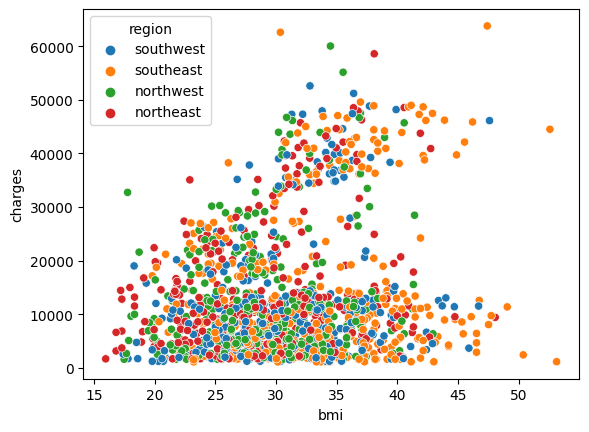

In [ ]:
sns.scatterplot(x='age', y='charges', hue='sex', data=df)
plt.show()
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.show()
sns.scatterplot(x='age', y='charges', hue='region', data=df)
plt.show()
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df)
plt.show()
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.show()
sns.scatterplot(x='bmi', y='charges', hue='region', data=df)
plt.show()

### **Завдання 6**

In [ ]:
X = df.drop(['charges'], axis=1)
y = df['charges'].values

### **Завдання 7**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_features] = MinMaxScaler().fit_transform(X[numeric_features])

### **Завдання 8**

In [ ]:
smoker_mapping = {'yes': 1, 'no': 0}
sex_mapping = {'male': 1, 'female': 0}
region_mapping = {'northwest': 0, 'northeast': 1, 'southwest': 3, 'southeast': 4}

for mapping in (smoker_mapping, sex_mapping, region_mapping):
  X = X.replace(mapping)


### **Завдання 9**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Завдання 10**

In [ ]:
from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(x_train, y_train)


LinearRegression()

### **Завдання 11**

In [ ]:
y_pred_train = multiple_linear_reg.predict(x_train)
y_pred_test = multiple_linear_reg.predict(x_test)

### **Завдання 12**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Навчальний набір:")
print("R-квадрат:", r2_train)
print("Середня квадратична помилка:", mse_train)

print("\nТренувальний набір:")
print("R-квадрат:", r2_test)
print("Середня квадратична помилка:", mse_test)


Навчальний набір:
R-квадрат: 0.7414017966937934
Середня квадратична помилка: 37324415.30858933

Тренувальний набір:
R-квадрат: 0.7833844072972129
Середня квадратична помилка: 33629295.98844635
